# **Data Science Final Project Sages Kodolamacz**
### **Title: Breast Cancer Analysis**

## **Part_1: Description of the problem**

Breast cancer is an uncontrolled growth of breast cells.
The term “breast cancer” refers to a malignant tumor that has developed from cells in the breast. Usually breast cancer either begins in the cells of the lobules, which are the milk-producing glands, or the ducts, the passages that drain milk from the lobules to the nipple. Less commonly, breast cancer can begin in the stromal tissues, which include the fatty and fibrous connective tissues of the breast.

**About 1 in 8 U.S. women (about 13%) will develop invasive breast cancer over the course of her lifetime.**

**In 2022, an estimated 287,850 new cases of invasive breast cancer are expected to be diagnosed in women in the U.S., along with 51,400 new cases of non-invasive (in situ) breast cancer.**


## **1.1 Expected outcome**

Build a model that can classify a breast cancer tumor using two training classification:
* 0 = no-recurrence-events
* 1 = recurrence-events

Data source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

## **1.2 Objective**

Using the Classification Model to Predict Breast Cancer Recurrence:
The classifier object was then used to predict the class on the test slice of the dataset using ModelPredictions = recurrence_classifier.predict(X_test)

## **1.3 Identify data sources**

This data set includes **200** instances of one class (**no-recurrence-events**)  and **85** instances of
another class (**recurrence-events**). 
A recurrence event is characterised by the cancer “coming back” after at least a year of remission. This reappearance can be either locally (in the same organ), regionally(in a close-by organ) or distant (in another part of the body). 


The instances are described by 9 attributes	some of
which are **linear** and some are **nominal**.

* First column in dataset store the Class (no-recurrence-events/recurrence-events)
* The columns 2-10 contain real-value feature Which can be used to build a model to predict whether a tumor-size by Class.

* Age: age of the patient at the time of diagnosis;
* Menopause: whether the patient is pre- or postmenopausal at time of diagnosis;
* Tumor size: the greatest diameter (in mm) of the excised tumor;
* Inv-nodes: the number (range 0 - 39) of axillary lymph nodes that contain metastatic breast cancer visible on histological examination;
* Node caps: if the cancer does metastasise to a lymph node, although outside the original site of the tumor it may remain “contained” by the capsule of the lymph node. However, over time, and with more aggressive disease, the tumor may replace the lymph node and then penetrate the capsule, allowing it to invade the surrounding tissues;
* Degree of malignancy: the histological grade (range 1-3) of the tumor. Tumors that are grade 1 predominantly consist of cells that, while neoplastic, retain many of their usual characteristics. Grade 3 tumors predominately consist of cells that are highly abnormal;
* Breast: breast cancer may obviously occur in either breast;
* Breast quadrant: the breast may be divided into four quadrants, using the nipple as a central point;
* Irradiation: radiation therapy is a treatment that uses high-energy x-rays to destroy cancer cells.

# **Load libraries and set options**

### **Load Dataset and library** ###

In [519]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np         # linear algebra
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

#### First, load the supplied CSV file using additional options in the Pandas read_csv function ####
###### **data.head()** returns the first 5 rows from the DataFrame (excluding the header).######

In [520]:
# read contents of csv file
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data")
# adding header
headerList = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad','irradiat']
# converting data frame to csv
df.to_csv("breast-cancer-2.csv", header=headerList, index=False)
# display modified csv file
df = pd.read_csv("breast-cancer-2.csv")
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


###### **df.shape()** returns data records with columns from the DataFrame######

In [521]:
print(df.shape)

(285, 10)


###### **df.info()** returns summary of data records  it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using######

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        285 non-null    object
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumor-size   285 non-null    object
 4   inv-nodes    285 non-null    object
 5   node-caps    285 non-null    object
 6   deg-malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


###### **df.isnull().any()** Check for missing variables######

In [523]:
df.isnull().any()

Class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
dtype: bool

**As we see above except for one column, all other columns are categorical data. We need some method of coding to convert them.**

In [524]:
for col in df:
  print(df[col].value_counts())

no-recurrence-events    200
recurrence-events        85
Name: Class, dtype: int64
50-59    96
40-49    90
60-69    57
30-39    35
70-79     6
20-29     1
Name: age, dtype: int64
premeno    149
ge40       129
lt40         7
Name: menopause, dtype: int64
30-34    59
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64
0-2      212
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64
no     221
yes     56
?        8
Name: node-caps, dtype: int64
2    130
3     84
1     71
Name: deg-malig, dtype: int64
left     151
right    134
Name: breast, dtype: int64
left_low     109
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64
no     217
yes     68
Name: irradiat, dtype: int64


### Procedure transformation and sort values to numbers###
Procedure is below.
The blue number indicates the order of the given value in dataframe.

Clean |Order strings from A-Z or 0-n
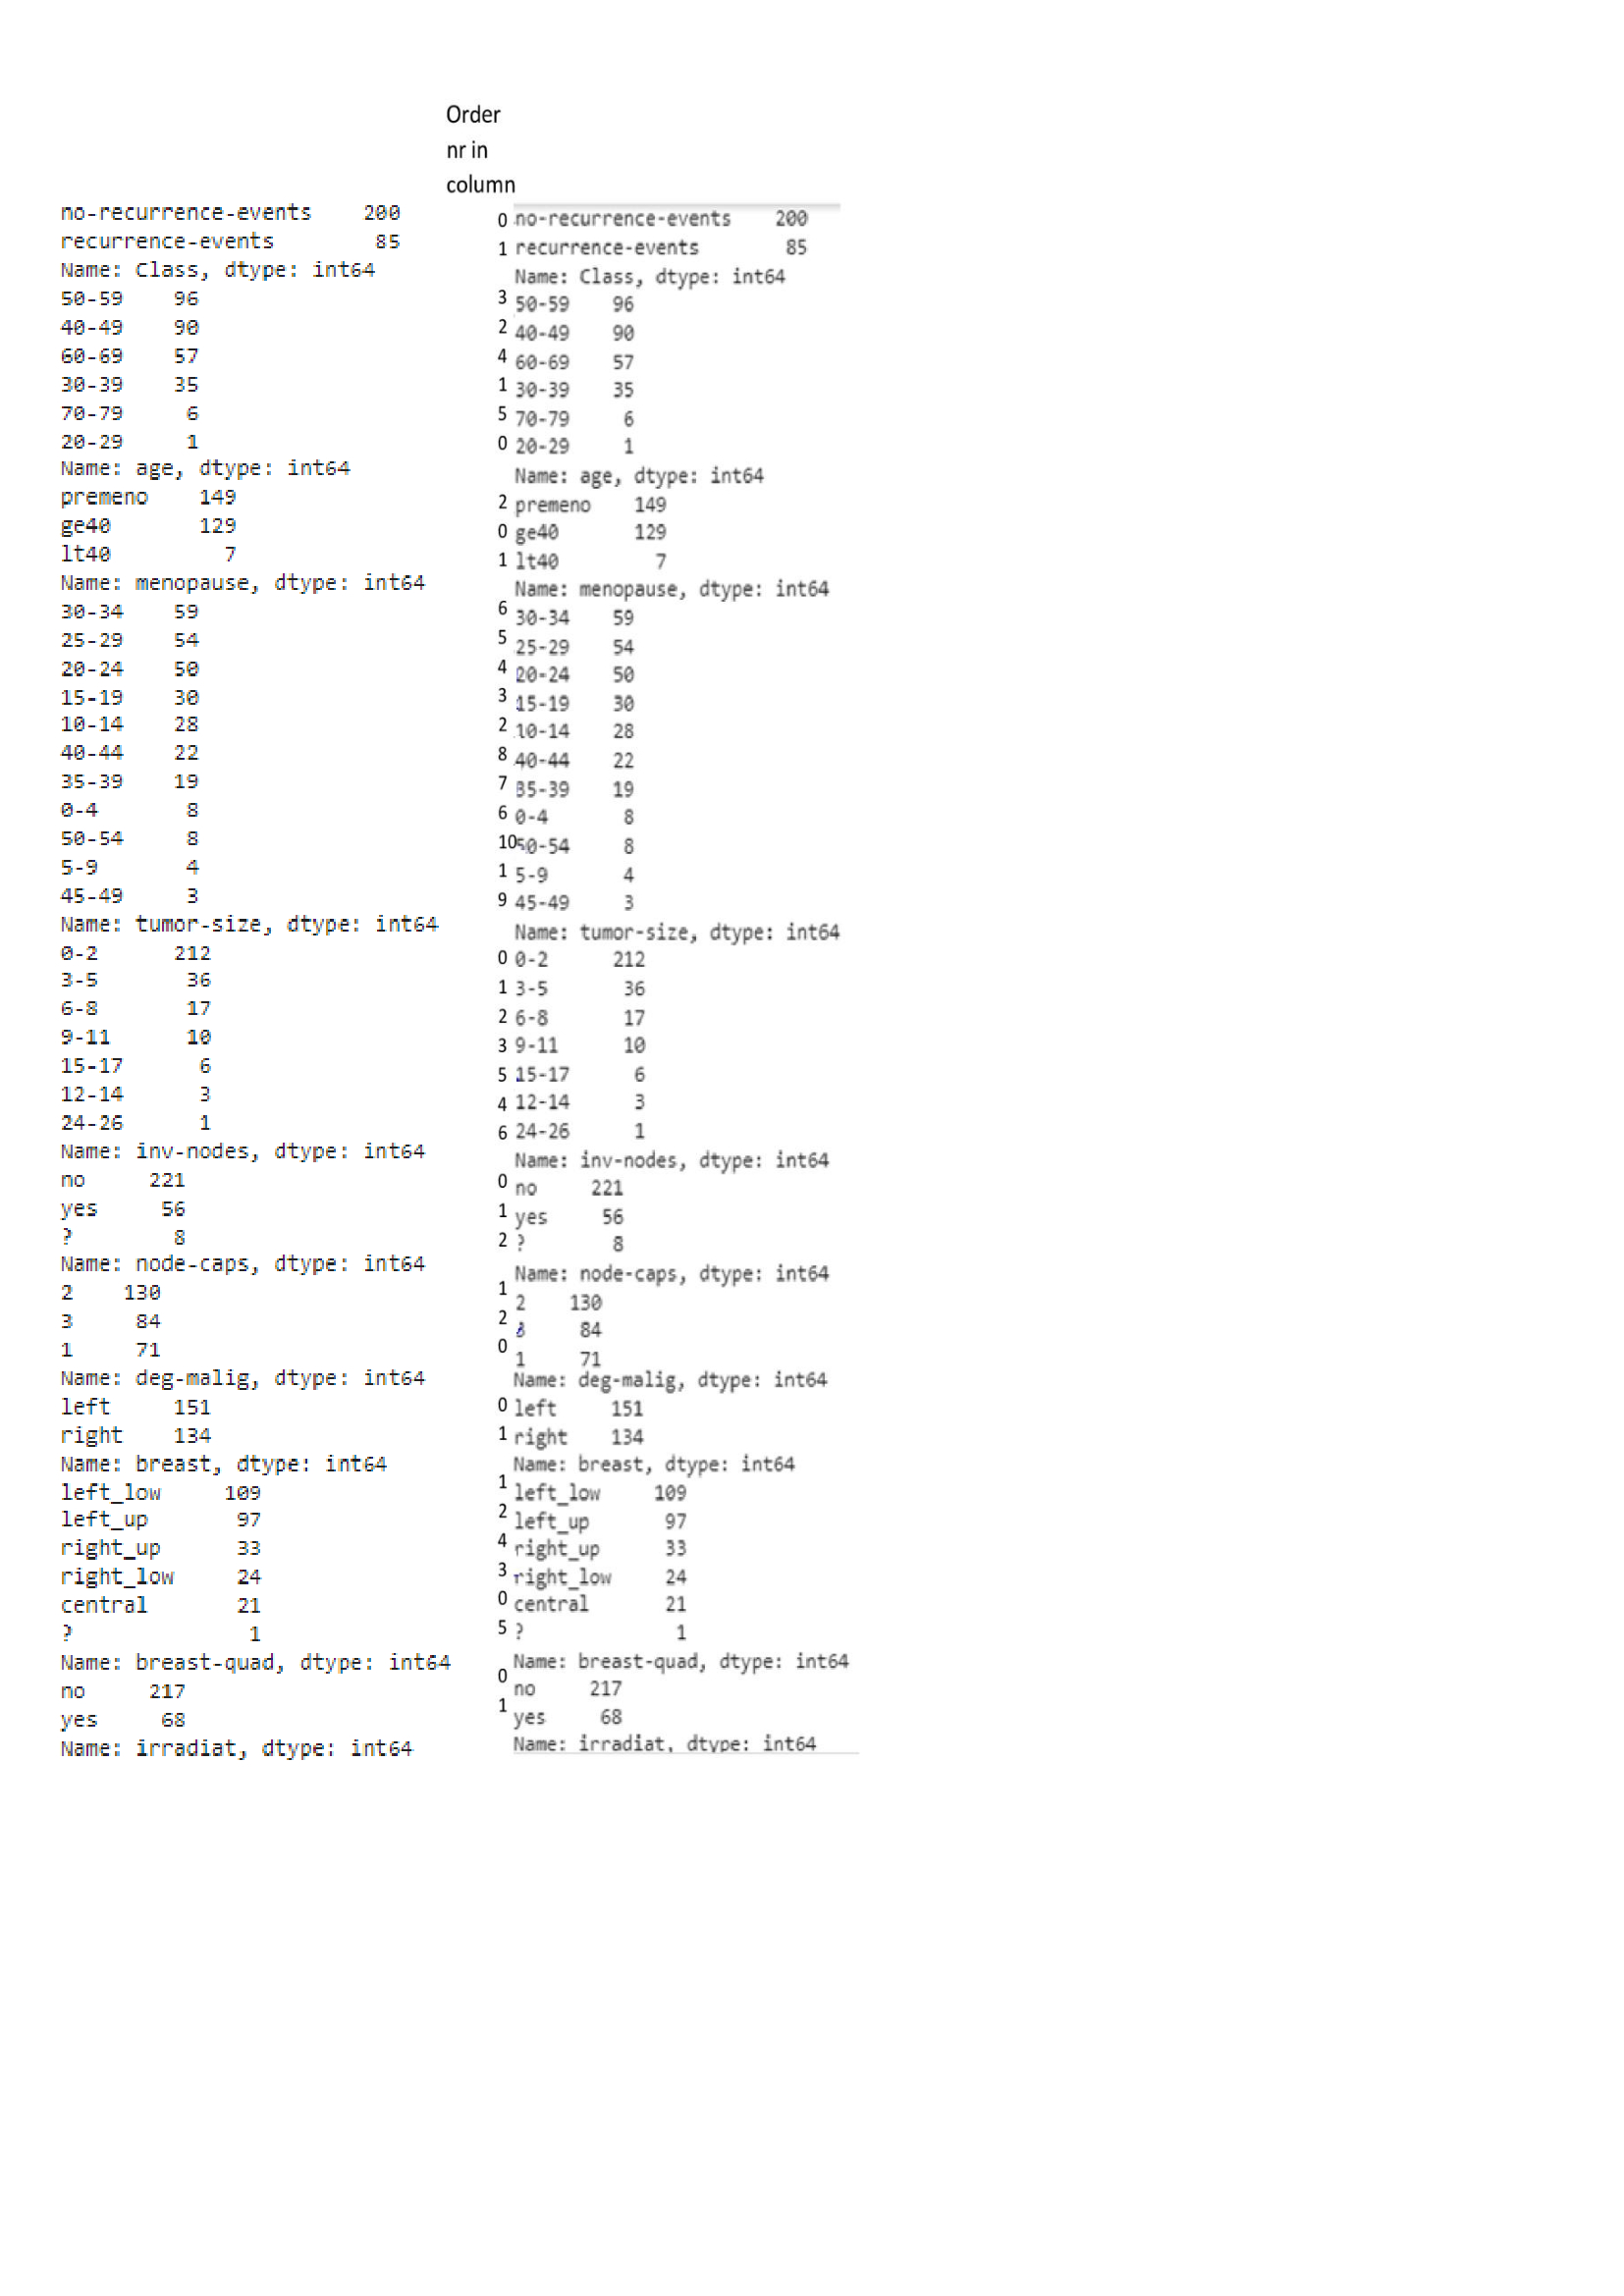

In [525]:
# Save the cleaner version of dataframe for future analyis
df.to_csv('breast-cancer-clean.csv', index=False)
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


## **Part_2: Exploratory Data Analysis (EDA)**

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.

## **2.1 Objectives of Data Exploration**

* summary statistics and visualizations to better understand data
* an overall picture of your data Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers

## **2.2 Transformation strings to numbers**

In [526]:
df['tumor-size'] = df['tumor-size'].replace(['0-4', '5-9'],['00-4','05-9'])
df['inv-nodes'] = df['inv-nodes'].replace(['0-2', '3-5', '6-8', '9-11'],['00-2','03-5','06-8','09-11'])
df['node-caps'] = df['node-caps'].replace(['no', 'yes', '?'],['0','1','2'])
df['breast-quad'] = df['breast-quad'].replace(['central', 'left_low', 'left_up','right_low', 'right_up', '?'],['0','1','2','3','4','5'])
df['irradiat'] = df['irradiat'].replace(['no', 'yes'],['0','1'])

sorted_class = sorted(df['Class'].unique())
sorted_age = sorted(df['age'].unique())
sorted_menopause = sorted(df['menopause'].unique())
sorted_tumor_size = sorted(df['tumor-size'].unique())
sorted_inv_nodes = sorted(df['inv-nodes'].unique())
sorted_node_caps = sorted(df['node-caps'].unique())
sorted_deg_malig = sorted(df['deg-malig'].unique())
sorted_breast = sorted(df['breast'].unique())
sorted_breast_quad = sorted(df['breast-quad'].unique())
sorted_irradiat = sorted(df['irradiat'].unique())

class_encoding = {sorted_class[i]:i for i in range(len(sorted_class))}
age_encoding = {sorted_age[i]:i for i in range(len(sorted_age))}
menopause_encoding = {sorted_menopause[i]:i for i in range(len(sorted_menopause))}
tumor_size_encoding = {sorted_tumor_size[i]:i for i in range(len(sorted_tumor_size))}
inv_nodes_encoding = {sorted_inv_nodes[i]:i for i in range(len(sorted_inv_nodes))}
node_caps_encoding = {sorted_node_caps[i]:i for i in range(len(sorted_node_caps))}
deg_malig_encoding = {sorted_deg_malig[i]:i for i in range(len(sorted_deg_malig))}
breast_encoding = {sorted_breast[i]:i for i in range(len(sorted_breast))}
breast_quad_encoding = {sorted_breast_quad[i]:i for i in range(len(sorted_breast_quad))}
irradiat_encoding = {sorted_irradiat[i]:i for i in range(len(sorted_irradiat))}

df['Class'] = df['Class'].map(class_encoding)
df['age'] = df['age'].map(age_encoding)
df['menopause'] = df['menopause'].map(menopause_encoding)
df['tumor-size'] = df['tumor-size'].map(tumor_size_encoding)
df['inv-nodes'] = df['inv-nodes'].map(inv_nodes_encoding)
df['node-caps'] = df['node-caps'].map(node_caps_encoding)
df['deg-malig'] = df['deg-malig'].map(deg_malig_encoding)
df['breast'] = df['breast'].map(breast_encoding)
df['breast-quad'] = df['breast-quad'].map(breast_quad_encoding)
df['irradiat'] = df['irradiat'].map(irradiat_encoding)

#df.drop('Unnamed: 0',axis=1, inplace=True)
df.to_csv('breast-cancer-clean.csv', index=False)
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,2,2,4,0,0,1,1,4,0
1,0,2,2,4,0,0,1,0,1,0
2,0,4,0,3,0,0,1,1,2,0
3,0,2,2,0,0,0,1,1,3,0
4,0,4,0,3,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
280,1,1,2,6,0,0,1,0,2,0
281,1,1,2,4,0,0,2,0,2,1
282,1,4,0,4,0,0,0,1,2,0
283,1,2,0,6,1,0,2,0,1,0


In [527]:
df.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,0.298246,2.670175,1.070175,4.877193,0.519298,0.252632,1.045614,0.470175,1.796491,0.238596
std,0.458293,1.008758,0.986880,2.108586,1.111945,0.495794,0.737351,0.499988,1.104084,0.426975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,2.000000,5.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,1.000000,3.000000,2.000000,6.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000
max,1.000000,5.000000,2.000000,10.000000,6.000000,2.000000,2.000000,1.000000,5.000000,1.000000


# Confirmation of good order

In [528]:
for col in df:
  print(df[col].value_counts())

0    200
1     85
Name: Class, dtype: int64
3    96
2    90
4    57
1    35
5     6
0     1
Name: age, dtype: int64
2    149
0    129
1      7
Name: menopause, dtype: int64
6     59
5     54
4     50
3     30
2     28
8     22
7     19
0      8
10     8
1      4
9      3
Name: tumor-size, dtype: int64
0    212
1     36
2     17
3     10
5      6
4      3
6      1
Name: inv-nodes, dtype: int64
0    221
1     56
2      8
Name: node-caps, dtype: int64
1    130
2     84
0     71
Name: deg-malig, dtype: int64
0    151
1    134
Name: breast, dtype: int64
1    109
2     97
4     33
3     24
0     21
5      1
Name: breast-quad, dtype: int64
0    217
1     68
Name: irradiat, dtype: int64


In [529]:
df.skew()

Class          0.886683
age            0.014440
menopause     -0.141410
tumor-size     0.060796
inv-nodes      2.612872
node-caps      1.818388
deg-malig     -0.072147
breast         0.120144
breast-quad    0.663327
irradiat       1.233097
dtype: float64

## **2.3 Data Visualizations**

# 2 techniques to understand each attribute of dataset independently.

* Histograms,
* Density Plots.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



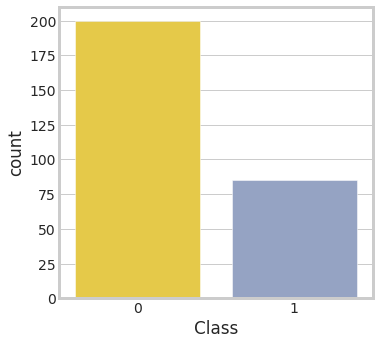

In [530]:
#frequency of Class
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (5, 5)})
sns.countplot(df['Class'],label='Count',palette="Set2_r")

#**Visualize distribution of data via density plots**#

Class
0    [[AxesSubplot(0.08,0.714694;0.241667x0.165306)...
1    [[AxesSubplot(0.08,0.714694;0.241667x0.165306)...
dtype: object

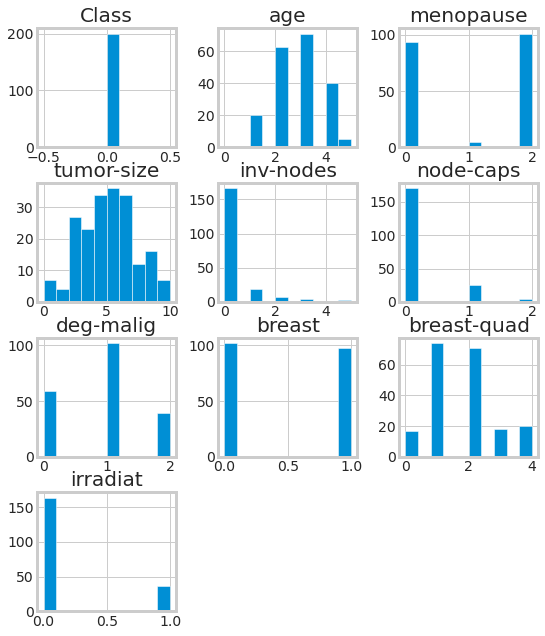

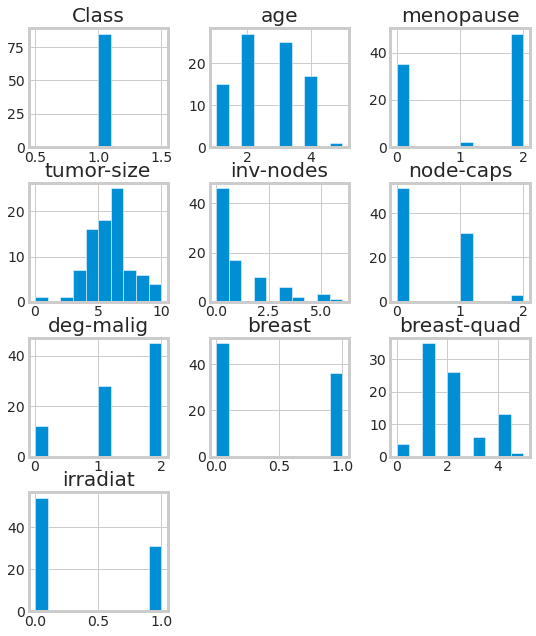

In [531]:
df.groupby('Class').hist(bins=10,figsize=(8, 10), grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfa0497e50>,
      dtype=object)

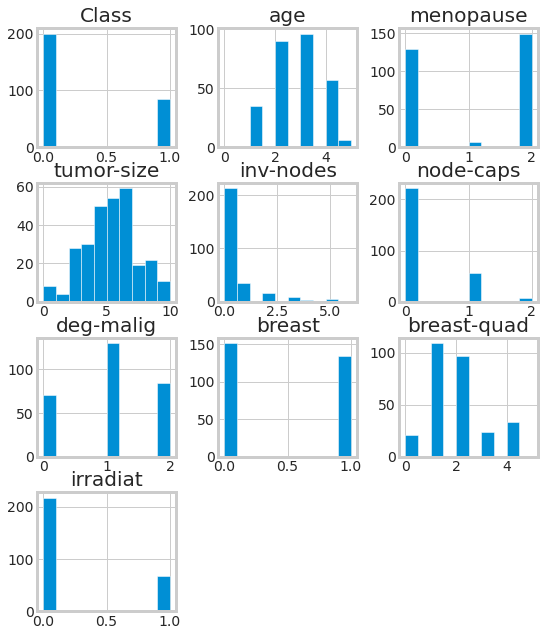

In [532]:
df.hist(bins=10,figsize=(8, 10), grid=True)

df.groupby('Class').hist(bins=10,figsize=(8, 10), grid=True)

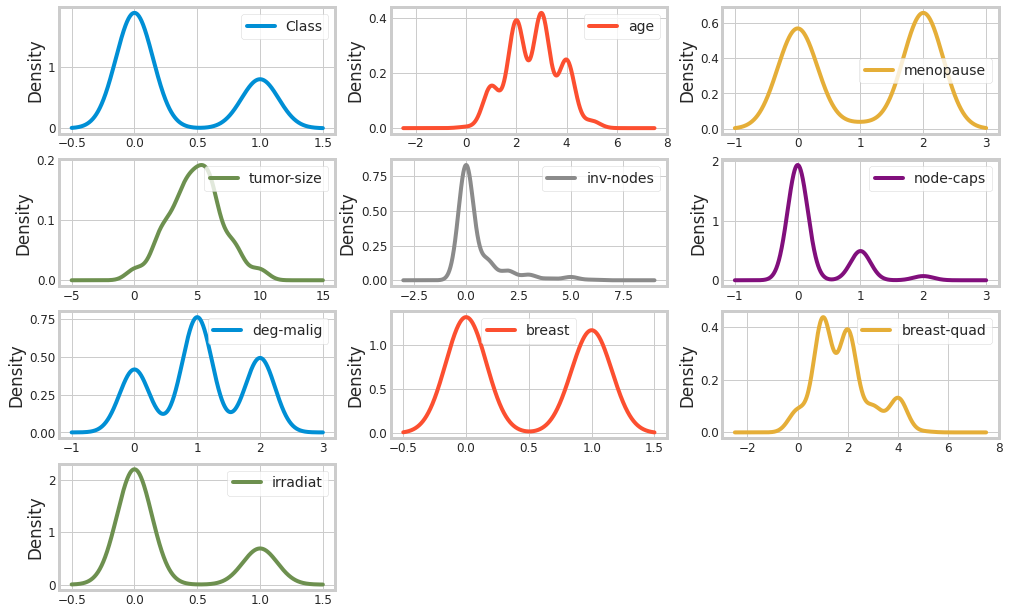

In [533]:
#Density Plots
plt = df.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))

# Conclusion.
Tumor-size attributes may have a Gaussian or nearly Gaussian distribution.

In [534]:
corr = df.corr()
corr

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
Class,1.000000,-0.075897,0.054770,0.176498,0.275416,0.240606,0.303457,-0.060927,0.064705,0.192887
age,-0.075897,1.000000,-0.719430,-0.007522,-0.047671,0.033423,-0.079114,-0.047497,-0.047833,-0.045551
menopause,0.054770,-0.719430,1.000000,0.000772,-0.026908,-0.036361,-0.047964,0.061345,0.074553,0.043687
tumor-size,0.176498,-0.007522,0.000772,1.000000,0.169965,0.157770,0.216500,0.051622,0.161649,0.165634
inv-nodes,0.275416,-0.047671,-0.026908,0.169965,1.000000,0.565956,0.336050,-0.022711,0.034760,0.324007
node-caps,0.240606,0.033423,-0.036361,0.157770,0.565956,1.000000,0.199530,-0.054724,0.029928,0.379589
deg-malig,0.303457,-0.079114,-0.047964,0.216500,0.336050,0.199530,1.000000,-0.048827,0.059020,0.211362
breast,-0.060927,-0.047497,0.061345,0.051622,-0.022711,-0.054724,-0.048827,1.000000,0.193079,0.016957
breast-quad,0.064705,-0.047833,0.074553,0.161649,0.034760,0.029928,0.059020,0.193079,1.000000,0.006264
irradiat,0.192887,-0.045551,0.043687,0.165634,0.324007,0.379589,0.211362,0.016957,0.006264,1.000000


In [535]:
fig = px.imshow(corr,contrast_rescaling='infer')
fig.show()

##Classification ##

Classify patient data by the Class of Recurrence Event vs Non-Recurrence Events. This target variable is stored in 'y'.

In [536]:
y = df['Class']

In [537]:
y.dtype

dtype('int64')

## **Part_3: Pre-Processing the data**

##Use Cancer Characteristics & other gynechological details to predict the possibility of Breast Cancer Recurrence in Women.##

In [538]:
X = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig']

In [539]:
X = df[features_list]

In [540]:
X.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig
0,2,2,4,0,0,1
1,2,2,4,0,0,1
2,4,0,3,0,0,1
3,2,2,0,0,0,1
4,4,0,3,0,0,1


In [541]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

#Perform Test and Train split#

In [542]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2)

In [543]:
print("X\n", X)
print("\n")
print("\n")
print("X_train\n", X_train)
print("\n")
print("\n")
print("X_test\n", X_test)

X
      age  menopause  tumor-size  inv-nodes  node-caps  deg-malig
0      2          2           4          0          0          1
1      2          2           4          0          0          1
2      4          0           3          0          0          1
3      2          2           0          0          0          1
4      4          0           3          0          0          1
..   ...        ...         ...        ...        ...        ...
280    1          2           6          0          0          1
281    1          2           4          0          0          2
282    4          0           4          0          0          0
283    2          0           6          1          0          2
284    3          0           6          1          0          2

[285 rows x 6 columns]




X_train
      age  menopause  tumor-size  inv-nodes  node-caps  deg-malig
139    3          0           8          1          1          1
111    2          2           4          0        

In [544]:
print("Number instances in X_train dataset: ", X_train.shape)
print("Number instances in y_train dataset: ", y_train.shape)
print("Number instances in X_test dataset: ", X_test.shape)
print("Number instances in y_test dataset: ", y_test.shape)

Number instances in X_train dataset:  (142, 6)
Number instances in y_train dataset:  (142,)
Number instances in X_test dataset:  (143, 6)
Number instances in y_test dataset:  (143,)


In [545]:
print("Before OverSampling, counts of No-Recurrent Class '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, counts of Recurrent Class '1': {}".format(sum(y_train==1)))

Before OverSampling, counts of No-Recurrent Class '0': 97 

Before OverSampling, counts of Recurrent Class '1': 45


In [546]:
# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\n➔ The classifier accuracy score is {:03.2f}\n'.format(classifier_score))


➔ The classifier accuracy score is 0.72



In [547]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [548]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))


print("After OverSampling, counts of Non-Recurrent Class '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of Recurrent Class '1': {}".format(sum(y_train_res==1)))

After OverSampling, the shape of X_train: (194, 6)
After OverSampling, the shape of y_train: (194,) 

After OverSampling, counts of Non-Recurrent Class '0': 97
After OverSampling, counts of Recurrent Class '1': 97


In [549]:
#Trying Different Types of Classifiers
#1.Decision Tree Classifier
recurrence_classifier = DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)

#2. Logistic Regression
recurrence_classifier = LogisticRegression(random_state = 0)

#3. K-Nearest Neighbours
recurrence_classifier = KNeighborsClassifier(n_neighbors = 3, p = 2)


#4.Support Vector Classification
recurrence_classifier = SVC(kernel = 'linear', random_state = 0)

#4.Gaussian Naïve Bayes Algorithm
recurrence_classifier = GaussianNB()
#5.Random Forest Algorithm
recurrence_classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

#****************************FITTING CLASSIFIER ON TRAINING SET******************************
recurrence_classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [550]:
type(recurrence_classifier)

sklearn.ensemble._forest.RandomForestClassifier

In [551]:
ModelPredictions = recurrence_classifier.predict(X_test)

In [552]:
ModelPredictions[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [553]:
#Indicator_test['high_humidity_label'][:10]
df_test.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
22,0,3,2,8,0,0,1,0,2,0
161,0,4,0,2,0,0,1,1,2,1
132,0,3,0,8,0,0,2,0,4,0
217,1,4,0,6,0,0,2,1,0,0
84,0,3,0,7,0,0,2,0,2,0
141,0,4,0,2,0,0,0,0,2,0
164,0,2,2,4,1,0,1,1,2,0
65,0,2,2,5,0,0,0,1,3,0
60,0,2,2,2,0,0,0,1,3,0
147,0,1,2,4,0,0,2,0,0,0


In [554]:
accuracy_score(y_true = y_test, y_pred = ModelPredictions)
confusion_matrix(y_true = y_test, y_pred = ModelPredictions)
print(classification_report(y_true = y_test, y_pred = ModelPredictions))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       103
           1       0.45      0.62      0.52        40

    accuracy                           0.68       143
   macro avg       0.64      0.66      0.64       143
weighted avg       0.72      0.68      0.69       143



#**Summary**
Worked with a classification predictive modeling machine learning problem using Python. The steps covered were:

* Problem Definition (Breast Cancer data),
* Loading the Dataset,
* Analyze Data.